In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import shutil
import os
import operator
import warnings
from math import comb
from datetime import datetime
import pytz
from requests_html import AsyncHTMLSession
from collections import defaultdict
import nest_asyncio
from datetime import date
import unicodedata
import random
from matplotlib.ticker import MaxNLocator

warnings.filterwarnings("ignore")
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['savefig.facecolor'] = 'w'

In [64]:
multiply_by_number = 1000 # To show the values better (no mathematicians)

In [65]:
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [66]:
outdir = './analysis/'
outpath = outdir + 'players/'

if os.path.exists(outpath):
    shutil.rmtree(outpath)

if not os.path.exists(outpath):
    os.makedirs(outpath)

outdir1 = './players_html/'

if os.path.exists(outdir1):
    shutil.rmtree(outdir1)

if not os.path.exists(outdir1):
    os.makedirs(outdir1)

outpath_teams = outdir + 'teams/'

if os.path.exists(outpath_teams):
    shutil.rmtree(outpath_teams)

if not os.path.exists(outpath_teams):
    os.makedirs(outpath_teams)

outdir2 = './teams_html/'

if os.path.exists(outdir2):
    shutil.rmtree(outdir2)

if not os.path.exists(outdir2):
    os.makedirs(outdir2)

### Possible combinations

The number of possible combinations to put $k$ coins on $n$ squadre, allowing only a maximum of $c$ per team is given by

\begin{equation}
\sum_{i = 0}^n {n \choose i} (-1)^{i} {n-1+k-i(c+1) \choose n-1}
\end{equation}

In our case, $k=10$, $n=32$, $c=4$, and therefore

In [67]:
k = 10
n = 32
c = 4
possible_combinations = 0

for i in range(n):
    if (n-1+k-i*(c+1)) <= 0:
        continue
    possible_combinations += comb(n,i) * comb(n-1+k-i*(c+1),n-1) * (-1)**i
    
print("Possible combinations: %s" %(possible_combinations))

Possible combinations: 1109036160


In [68]:
countries = ['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
'FRANCE', 'GERMANY', 'GHANA', 'IR IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
'SENEGAL', 'SERBIA', 'KOREA REPUBLIC', 'SPAIN', 'SWITZERLAND','TUNISIA', 'USA', 'URUGUAY', 'WALES']
countries = np.array(countries)

### Results

In [69]:
cmap = plt.get_cmap("tab10")

In [70]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))
teams = np.array(teams)
teams

array(['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
       'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
       'FRANCE', 'GERMANY', 'GHANA', 'IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
       'SENEGAL', 'SERBIA', 'SOUTH KOREA', 'SPAIN', 'SWITZERLAND',
       'TUNISIA', 'USA', 'URUGUAY', 'WALES'], dtype='<U12')

### Generating more data

In [71]:
# users = pd.read_csv('users.csv')
# users = users.iloc[: , 2:]

# for i in range(1,117):
#     namefile = 'https://arajantie.github.io/wc2022/player' + str(i) + '.html'
#     tables = pd.read_html(namefile)
#     tables = tables[0]
#     stringValue = tables.iloc[0][0]
#     alphabet = 'abcdefghijklmnopqrstuvwxyz_'

#     player_teams = []

#     current_team = ''
#     for c in stringValue:
#         if c == '_':
#             current_team += ' '
#         elif c in alphabet or c in alphabet.upper():
#             current_team += c
#         else:
#             current_team = ''
#         if current_team.upper() in teams:
#             player_teams.append(current_team.upper())
#             current_team = ''
#         if len(player_teams) == 10:
#             break

#     new_row = {}
#     new_row['name'] = alphabet
#     for j in range(len(player_teams)):
#         name = 'share' + str(j+1)
#         new_row[name] = player_teams[j]

#     users = users.append(new_row, ignore_index=True)

# numbers = np.random.permutation(len(users)) + 1

# for index, row in users.iterrows():
#     row['name'] = numbers[index]

# users = users.sort_values(by=['name'])
# users = users.reset_index(drop=True)

# for index, row in users.iterrows():
#     row['name'] = 'Player ' + str(index+1)

# users.to_csv('users.csv', index=False)
# users.tail(5)

In [72]:
users = pd.read_csv('website_users.csv')
users = users.iloc[: , 3:]
users.loc[users['name'] == 'Filippo Biafora ', 'name'] = 'Filippo Biafora'
users.loc[users['name'] == 'Andrea Troiani ', 'name'] = 'Andrea Troiani'

name_to_index = {}
for index, row in users.iterrows():
    name_to_index[row['name']] = 'Player ' + str(index + 1)
    row['name'] = 'Player ' + str(index + 1)

users.to_csv('users.csv')

users = pd.read_csv('website_users.csv')
users = users.iloc[: , 1:]
users.loc[users['name'] == 'Andrea Troiani ', 'name'] = 'Andrea Troiani'
users.loc[users['name'] == 'Filippo Biafora ', 'name'] = 'Filippo Biafora'
players = users['name'].tolist()
bdays = users['bday'].tolist()
money = users['money'].tolist()

users.head(5)

,bday,money,name,share1,share10,share2,share3,share4,share5,share6,share7,share8,share9
0,1989-02-04,NO,Lamberto Pioli,ARGENTINA,SERBIA,PORTUGAL,GERMANY,SERBIA,BRAZIL,BELGIUM,FRANCE,ARGENTINA,PORTUGAL
1,1993-01-15,YES,Luca Pioli,ARGENTINA,ENGLAND,ARGENTINA,CROATIA,MEXICO,USA,SERBIA,PORTUGAL,FRANCE,AUSTRALIA
2,1999-05-26,NO,Sophie Webster,SPAIN,BRAZIL,SPAIN,SPAIN,SPAIN,NETHERLANDS,NETHERLANDS,BRAZIL,SOUTH KOREA,WALES
3,1998-11-20,YES,Will Grassle,SENEGAL,DENMARK,WALES,POLAND,SWITZERLAND,GERMANY,BELGIUM,BELGIUM,SERBIA,POLAND
4,1993-03-25,YES,Maria Alejandra Chia Garcia,ENGLAND,SPAIN,ENGLAND,FRANCE,FRANCE,FRANCE,ENGLAND,SPAIN,SPAIN,SPAIN


Text(0.5, 1.0, 'Ages')

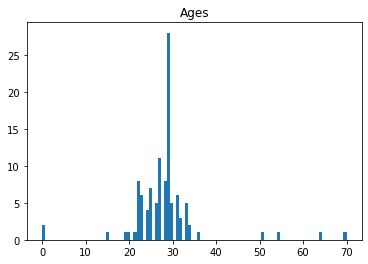

In [73]:
ages = []
today = date.today()

for bday in bdays:
    born = datetime.strptime(bday, "%Y-%m-%d").date()
    ages.append(today.year - born.year - ((today.month,today.day) < (born.month,born.day)))

plt.hist(ages, bins = 100)
plt.title('Ages')

In [74]:
betting_users = users.loc[users['money'] == 'YES']
betting_players = betting_users['name'].tolist()
betting_bdays = betting_users['bday'].tolist()

betting_users.head(5)

,bday,money,name,share1,share10,share2,share3,share4,share5,share6,share7,share8,share9
1,1993-01-15,YES,Luca Pioli,ARGENTINA,ENGLAND,ARGENTINA,CROATIA,MEXICO,USA,SERBIA,PORTUGAL,FRANCE,AUSTRALIA
3,1998-11-20,YES,Will Grassle,SENEGAL,DENMARK,WALES,POLAND,SWITZERLAND,GERMANY,BELGIUM,BELGIUM,SERBIA,POLAND
4,1993-03-25,YES,Maria Alejandra Chia Garcia,ENGLAND,SPAIN,ENGLAND,FRANCE,FRANCE,FRANCE,ENGLAND,SPAIN,SPAIN,SPAIN
5,1993-03-25,YES,Pritish Patil,SPAIN,POLAND,SPAIN,CROATIA,SAUDI ARABIA,SPAIN,ENGLAND,ENGLAND,ENGLAND,BELGIUM
6,1994-08-23,YES,Sebastian Rojas,ARGENTINA,BRAZIL,ARGENTINA,ARGENTINA,ARGENTINA,GERMANY,GERMANY,GERMANY,BRAZIL,BRAZIL


In [75]:
shares = []

for index, row in users.iterrows():
    shares_player = np.zeros(len(teams))
    for share in range(1,11):
        shares_player[np.argwhere(teams == row['share' + str(share)]).item()] += 1
    shares.append(shares_player.tolist())

shares = np.array(shares).T
shares.shape

(32, 109)

In [76]:
df = pd.DataFrame(shares, index=teams, columns=players)
df.head(5)

,Lamberto Pioli,Luca Pioli,Sophie Webster,Will Grassle,Maria Alejandra Chia Garcia,Pritish Patil,Sebastian Rojas,Raymond Wang,Sachin Kammula,Sebastián Carreño Leandro,...,Davide Benedetto,Adriano Vlad,Christine Ross,Kenneth Solomon,Kyrellos Ibrahim,Hannah Jonas,Sam Willett,Daniele Naim,Jillian Taylor,Bill Paine
ARGENTINA,2.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,...,4.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
AUSTRALIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
BELGIUM,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,1.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
BRAZIL,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,3.0,3.0,1.0,2.0,0.0,1.0,2.0,1.0,3.0,1.0
CAMEROON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


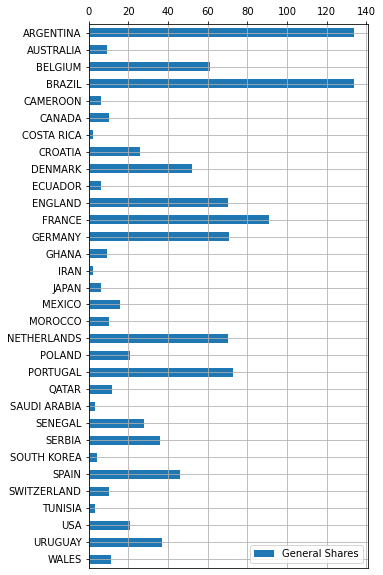

In [77]:
total_shares = np.sum(shares,axis = 1)

data = {'General Shares': total_shares,
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General Shares'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'general_shares.png',bbox_inches='tight', dpi=1000)

In [78]:
betting_shares = []

for index, row in users.iterrows():
    if row['money'] == 'NO':
        continue
    shares_player = np.zeros(len(teams))
    for share in range(1,11):
        shares_player[np.argwhere(teams == row['share' + str(share)]).item()] += 1
    betting_shares.append(shares_player.tolist())

betting_shares = np.array(betting_shares).T
betting_shares.shape

(32, 66)

In [79]:
df_betting = pd.DataFrame(betting_shares, index=teams, columns=betting_players)
df_betting.head(5)

,Luca Pioli,Will Grassle,Maria Alejandra Chia Garcia,Pritish Patil,Sebastian Rojas,Raymond Wang,Sebastián Carreño Leandro,Marlyn Karim,Leandro Schlottchauer,Simran Singh Hundal,...,John Jeang,Alessandro Toso,Gal Raz,Maurizio Tonnicchia,Adriano Vlad,Kyrellos Ibrahim,Hannah Jonas,Sam Willett,Daniele Naim,Bill Paine
ARGENTINA,2.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,0.0,...,0.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0
AUSTRALIA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
BELGIUM,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
BRAZIL,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,...,4.0,1.0,4.0,3.0,3.0,0.0,1.0,2.0,1.0,1.0
CAMEROON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


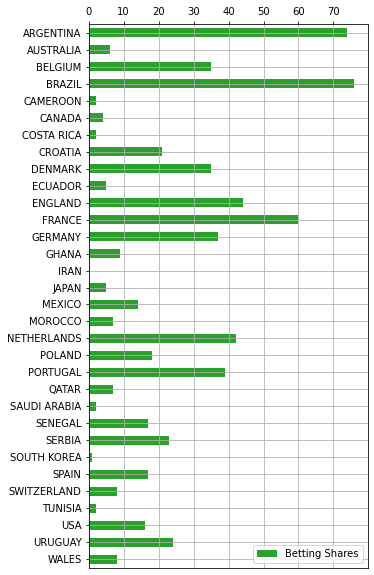

In [80]:
total_betting_shares = np.sum(betting_shares,axis = 1)

data = {'Betting Shares': total_betting_shares,
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['Betting Shares'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax, color =cmap(2))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'betting_shares.png',bbox_inches='tight', dpi=1000)

### Creating html per team

In [81]:
for team in teams:

    players_per_team = []
    players_per_betting_team = []

    for player in sorted(players):

        idx = players.index(player)
        values = shares[:,idx]
        choices = []

        for i,x in enumerate(values):
            if x == 0:
                continue
            for j in range(int(x)):
                if team == teams[i]:
                    players_per_team.append('<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(player).lower().split()) + '_general.html\">' + player + '</a>')

    res = pd.DataFrame(players_per_team, columns = ['<b>Shareholder</b>'])
    res.index += 1
    res.to_csv(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv')

    text = open(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv', "r")
    text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
    text = ''.join([i for i in text]).replace('\"\">', '\">')
    text = ''.join([i for i in text]).replace('</a>\"', '</a>')
    x = open(outpath_teams + ''.join(strip_accents(team).lower().split()) + '_general.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv')

    for player in sorted(betting_players):

        idx = betting_players.index(player)
        values = betting_shares[:,idx]
        choices = []

        for i,x in enumerate(values):
            if x == 0:
                continue
            for j in range(int(x)):
                if team == teams[i]:
                    players_per_betting_team.append('<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(player).lower().split()) + '_betting.html\">' + player + '</a>')

    res = pd.DataFrame(players_per_betting_team, columns = ['<b>Shareholder</b>'])
    res.index += 1
    res.to_csv(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_betting.csv')

    text = open(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_betting.csv', "r")
    text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
    text = ''.join([i for i in text]).replace('\"\">', '\">')
    text = ''.join([i for i in text]).replace('</a>\"', '</a>')
    x = open(outpath_teams + ''.join(strip_accents(team).lower().split()) + '_betting.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_betting.csv')

In [82]:
html_dir = './teams_html/'
originalfile = 'teams_template.html'

for team in teams:

    namefile = html_dir + ''.join(strip_accents(team).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(team).lower().split()) + '_general')
        text = ''.join([i for i in text]).replace('Template', team)
        x = open(namefile[:-9] + "_general.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

    namefile = html_dir + ''.join(strip_accents(team).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(team).lower().split()) + '_betting')
        text = ''.join([i for i in text]).replace('Template', team)
        x = open(namefile[:-9] + "_betting.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

### Points

#### Automated web scraper

In [83]:
def compute_points(df_res, *, players = None, total_shares = None, shares = None, print_scores = False):

    teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
    teams.sort()
    teams = list(map(str.upper,teams))
    
    eliminated_teams = []
    eliminated_teams.extend(['QATAR', 'ECUADOR', 'WALES', 'IRAN', 'TUNISIA', 'DENMARK', 'MEXICO', 'SAUDI ARABIA', 'BELGIUM', 'CANADA', 'COSTA RICA', 'GERMANY', 'URUGUAY', 'GHANA', 'SERBIA', 'CAMEROON'])
    playoffs_teams = ['NETHERLANDS', 'SENEGAL', 'ENGLAND', 'USA', 'FRANCE', 'AUSTRALIA', 'ARGENTINA', 'POLAND', 'CROATIA', 'MOROCCO', 'SPAIN', 'JAPAN', 'PORTUGAL', 'SOUTH KOREA', 'SWITZERLAND', 'BRAZIL']
    second_teams = ['SENEGAL', 'USA', 'POLAND', 'AUSTRALIA', 'SPAIN', 'CROATIA', 'SWITZERLAND', 'SOUTH KOREA']

    third_place = []
    second_place = []
    first_place = []

    if players != None:
        players_points = np.zeros((len(players),(len(df_res)+1)))
    
    points = np.zeros(len(teams))

    if print_scores:
        f_res = open(outdir + 'scores.txt','w')

    for index, row in df_res.iterrows():

        home_goal = int(row['scores'][0])
        away_goal = int(row['scores'][-1])
        home_team = row['home_teams'].upper()
        away_team = row['away_teams'].upper()

        day = int(row['times'][:2])
        month = int(row['times'][3:5])

        if datetime(2022, month, day) >= datetime(2022, 11, 20) and datetime(2022, month, day) < datetime(2022, 12, 3):

            if print_scores:
                print('Group stage: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 1
            elif home_goal == away_goal:
                points[teams.index(home_team)] += 0.5
                points[teams.index(away_team)] += 0.5
            else:
                points[teams.index(away_team)] += 1

        elif datetime(2022, month, day) >= datetime(2022, 12, 3) and datetime(2022, month, day) < datetime(2022, 12, 7):

            if print_scores:
                print('Round of 16: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 2
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 2
                eliminated_teams.append(home_team)

        elif datetime(2022, month, day) >= datetime(2022, 12, 9) and datetime(2022, month, day) < datetime(2022, 12, 11):

            if print_scores:
                print('Quarter - final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 4
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 4
                eliminated_teams.append(home_team)

        elif datetime(2022, month, day) >= datetime(2022, 12, 13) and datetime(2022, month, day) < datetime(2022, 12, 15):

            if print_scores:
                print('Semi - final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 8
            else:
                points[teams.index(away_team)] += 8

        elif datetime(2022, month, day) >= datetime(2022, 12, 17) and datetime(2022, month, day) < datetime(2022, 12, 18):

            if print_scores:
                print('Third-place final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))
            
            if home_goal > away_goal:
                points[teams.index(home_team)] += 4
                third_place.append(home_team)
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 4
                third_place.append(away_team)
                eliminated_teams.append(home_team)

        else:

            if print_scores:
                print('Final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 16
                first_place.append(home_team)
                second_place.append(away_team)
            else:
                points[teams.index(away_team)] += 16
                first_place.append(away_team)
                second_place.append(home_team)

        if index >= 32 and len(playoffs_teams) > 0:
            points[teams.index(playoffs_teams[0])] += 1
            if playoffs_teams[0] in second_teams:
                points[teams.index(playoffs_teams[0])] -= 0.5
            playoffs_teams.pop(0)
                
        if players != None:
            players_points[:,index+1] = list(dict(zip(players,np.nansum(points / total_shares * shares.T,axis=1).round(decimals=3))).values())

    if players != None:
        return points, eliminated_teams, third_place, second_place, first_place, players_points
    else:
        return points, eliminated_teams, third_place, second_place, first_place

In [84]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))

In [85]:
nest_asyncio.apply()
url = 'https://www.flashscore.com/football/world/world-cup/results/'
asession = AsyncHTMLSession()

async def get_scores():
    r = await asession.get(url)
    await r.html.arender(timeout = 30)
    return r

results = asession.run(get_scores)
results = results[0]

times = results.html.find("div.event__time")
home_teams = results.html.find("div.event__participant.event__participant--home")
home_scores = results.html.find("div.event__score.event__score--home")
away_scores = results.html.find("div.event__score.event__score--away")
away_teams = results.html.find("div.event__participant.event__participant--away")
#event_part = results.html.find("div.event__part")

dict_res = defaultdict(list)

for ind in range(len(times)):

    if times[ind].text.split()[0][:2] == '14' and times[ind].text.split()[0][3:5] == '06':
        break

    dict_res['times'].append(times[ind].text.split('\n')[0])
    dict_res['home_teams'].append(home_teams[ind].text.split('\n')[0])
    home_score = home_scores[ind].text.split('\n')[0]
    away_score = away_scores[ind].text.split('\n')[0]
    dict_res['scores'].append(home_score + ' ' + away_score)
    dict_res['away_teams'].append(away_teams[ind].text.split('\n')[0])
    #dict_res['event_part'].append(event_part[ind].text)

df_res = pd.DataFrame(dict_res)
df_res = df_res.iloc[::-1].reset_index(drop=True)
# df_res.loc[len(df_res.index)] = ['14.12. 20:00', 'France', '2 0', 'Morocco']
df_res.tail(5)

,times,home_teams,scores,away_teams
59,10.12. 20:00,England,1 2,France
60,13.12. 20:00,Argentina,3 0,Croatia
61,14.12. 20:00,France,2 0,Morocco
62,17.12. 16:00,Croatia,2 1,Morocco
63,18.12. 16:00,Argentina,4 3,France


In [86]:
points, eliminated_teams, third_place, second_place, first_place, players_points = compute_points(df_res,players=players,total_shares=total_shares,shares=shares,print_scores=True)
points, eliminated_teams, third_place, second_place, first_place, betting_players_points = compute_points(df_res,players=betting_players,total_shares=total_betting_shares,shares=betting_shares)

Group stage: QATAR 0 - 2 ECUADOR
Group stage: ENGLAND 6 - 2 IRAN
Group stage: SENEGAL 0 - 2 NETHERLANDS
Group stage: USA 1 - 1 WALES
Group stage: ARGENTINA 1 - 2 SAUDI ARABIA
Group stage: DENMARK 0 - 0 TUNISIA
Group stage: MEXICO 0 - 0 POLAND
Group stage: FRANCE 4 - 1 AUSTRALIA
Group stage: MOROCCO 0 - 0 CROATIA
Group stage: GERMANY 1 - 2 JAPAN
Group stage: SPAIN 7 - 0 COSTA RICA
Group stage: BELGIUM 1 - 0 CANADA
Group stage: SWITZERLAND 1 - 0 CAMEROON
Group stage: URUGUAY 0 - 0 SOUTH KOREA
Group stage: PORTUGAL 3 - 2 GHANA
Group stage: BRAZIL 2 - 0 SERBIA
Group stage: WALES 0 - 2 IRAN
Group stage: QATAR 1 - 3 SENEGAL
Group stage: NETHERLANDS 1 - 1 ECUADOR
Group stage: ENGLAND 0 - 0 USA
Group stage: TUNISIA 0 - 1 AUSTRALIA
Group stage: POLAND 2 - 0 SAUDI ARABIA
Group stage: FRANCE 2 - 1 DENMARK
Group stage: ARGENTINA 2 - 0 MEXICO
Group stage: JAPAN 0 - 1 COSTA RICA
Group stage: BELGIUM 0 - 2 MOROCCO
Group stage: CROATIA 4 - 1 CANADA
Group stage: SPAIN 1 - 1 GERMANY
Group stage: CAMEROO

In [87]:
np.array(eliminated_teams)

array(['QATAR', 'ECUADOR', 'WALES', 'IRAN', 'TUNISIA', 'DENMARK',
       'MEXICO', 'SAUDI ARABIA', 'BELGIUM', 'CANADA', 'COSTA RICA',
       'GERMANY', 'URUGUAY', 'GHANA', 'SERBIA', 'CAMEROON', 'USA',
       'AUSTRALIA', 'POLAND', 'SENEGAL', 'JAPAN', 'SOUTH KOREA', 'SPAIN',
       'SWITZERLAND', 'BRAZIL', 'NETHERLANDS', 'PORTUGAL', 'ENGLAND',
       'MOROCCO'], dtype='<U12')

In [88]:
third_place, second_place, first_place

(['CROATIA'], ['FRANCE'], ['ARGENTINA'])

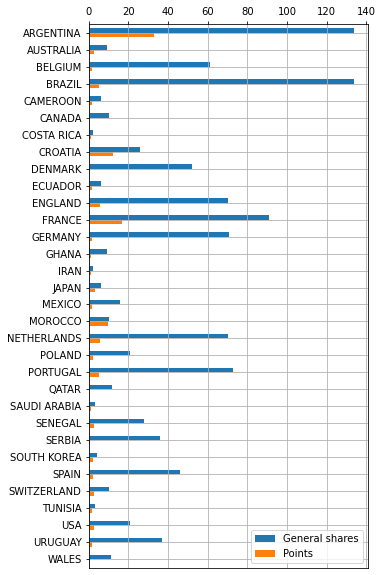

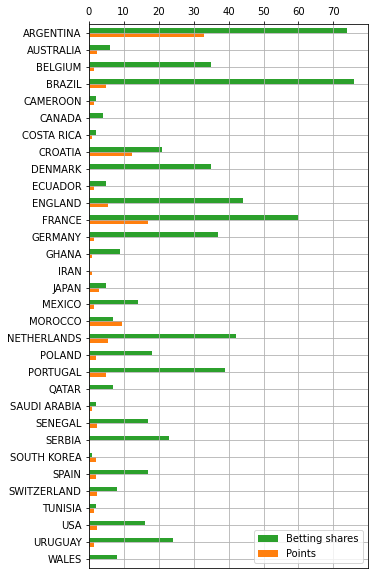

In [89]:
data = {'General shares': total_shares,
        'Points': points
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General shares','Points'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax, color = (cmap(0),cmap(1)))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'general_shares_points_team.png',bbox_inches='tight', dpi=1000)

data = {'Betting shares': total_betting_shares,
        'Points': points
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['Betting shares','Points'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax,color=(cmap(2),cmap(1)))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'betting_shares_points_team.png',bbox_inches='tight', dpi=1000)

### Ranking

In [90]:
values_team = (points / total_shares).round(decimals = 3)
betting_values_team = (points / total_betting_shares).round(decimals = 3)

In [91]:
teams_general = []
teams_betting = []

for team in teams:
    teams_general.append('<a href=\"https://naiimic.github.io/content/fantasyshares/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_general.html\">' + team + '</a>')
    teams_betting.append('<a href=\"https://naiimic.github.io/content/fantasyshares/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_betting.html\">' + team + '</a>')

general_contribution = list(zip(teams_general, total_shares.astype(int), points, values_team))
res = pd.DataFrame(general_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
res.to_csv(outdir + 'tmp_general_contribution.csv',index=False) 

text = open(outdir + "tmp_general_contribution.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_contribution.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_contribution.csv")

betting_contribution = list(zip(teams_betting, total_betting_shares.astype(int), points, betting_values_team))
res = pd.DataFrame(betting_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
res.to_csv(outdir + 'tmp_betting_contribution.csv',index=False) 

text = open(outdir + "tmp_betting_contribution.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "betting_contribution.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_betting_contribution.csv")

In [92]:
# general_contribution = list(zip(teams, total_shares.astype(int), points, values_team))

# res = pd.DataFrame(general_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
# res.to_csv(outdir + 'general_contribution.csv',index=False) 

# betting_contribution = list(zip(teams, total_betting_shares.astype(int), points, betting_values_team))

# res = pd.DataFrame(betting_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
# res.to_csv(outdir + 'betting_contribution.csv',index=False) 

In [93]:
general_ranking = dict(zip(players,np.nansum(values_team * shares.T,axis=1).round(decimals=3)))
general_ranking = dict(sorted(general_ranking.items(), key=operator.itemgetter(1),reverse=True))

betting_ranking = dict(zip(betting_players,np.nansum(betting_values_team * betting_shares.T,axis=1).round(decimals=3)))
betting_ranking = dict(sorted(betting_ranking.items(), key=operator.itemgetter(1),reverse=True))    

In [94]:
len(general_ranking), len(betting_ranking)

(109, 66)

In [95]:
general_ranking_Matrix = np.zeros((len(players),2),dtype=object)
general_ranking_Matrix[:,0] = list(general_ranking.keys())
general_ranking_Matrix[:,1] = list(general_ranking.values())

# np.savetxt(outdir + "general_ranking.txt", general_ranking_Matrix, delimiter=" ", fmt="%s") 

betting_ranking_Matrix = np.zeros((len(betting_players),2),dtype=object)
betting_ranking_Matrix[:,0] = list(betting_ranking.keys())
betting_ranking_Matrix[:,1] = list(betting_ranking.values())

# np.savetxt(outdir + "betting_ranking.txt", betting_ranking_Matrix, delimiter=" ", fmt="%s") 

In [96]:
loc_dt = datetime.now(pytz.timezone('US/Eastern'))
fmt = '%d-%m-%Y %H:%M:%S, UTC%z'
changetime = loc_dt.strftime(fmt)
changetime

'07-01-2023 15:26:16, UTC-0500'

### Create CSV per player, including their points

In [97]:
'''
    Function to create csv for all the players, showing their squad. A team will be "striked" if is no longer in the tournament
'''

html_dir = './players_html/'
originalfile = 'template.html'

for player in players:

    idx = players.index(player)
    values = shares[:,idx]
    choices = []
    
    teams_points_players = []

    for i,x in enumerate(values):
        if x == 0:
            continue
        for j in range(int(x)):
            if teams[i] in eliminated_teams:
                # choices.append('<span style=\"color: red;\">' + teams[i] + '</span>')
                # choices.append('<span><strike>' + teams[i] + '</strike></span>')
                choices.append('<span style=\"-webkit-text-decoration: line-through; text-decoration: line-through; -webkit-text-decoration-thickness: 1.5px; text-decoration-thickness: 1.5px; -webkit-text-decoration-color: red; text-decoration-color: red;\">' + teams[i] + '</span>')
            elif teams[i] in third_place:
                choices.append('<span style=\"color: brown;\"><b>' + teams[i] + '</b></span>') # bronze
            elif teams[i] in second_place:
                choices.append('<span style=\"color: silver;\"><b>' + teams[i] + '</b></span>') # silver
            elif teams[i] in first_place:
                choices.append('<span style=\"color: gold;\"><b>' + teams[i] + '</b></span>') # gold
            else:
                choices.append(teams[i])
            teams_points_players.append(int(general_contribution[i][3] * multiply_by_number))

    res = pd.DataFrame(list(zip(choices, teams_points_players)), columns = ['<b>Team</b>', '<b>Points</b>'])
    res.index += 1

    res.to_csv(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv') 
    text = open(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv', "r")
    text = ''.join([i for i in text]).replace('\"<span', '<span')
    text = ''.join([i for i in text]).replace('\"\"', '\"')
    text = ''.join([i for i in text]).replace('</span>\"', '</span>')

    x = open(outpath + ''.join(strip_accents(player).lower().split()) + '_general.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv')

    namefile = html_dir + ''.join(strip_accents(player).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(player).lower().split()) + '_general')
        text = ''.join([i for i in text]).replace('Template', player)
        x = open(namefile[:-9] + "_general.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

for player in betting_players:

    idx = players.index(player)
    values = shares[:,idx]
    choices = []
    teams_points_players = []

    for i,x in enumerate(values):
        if x == 0:
            continue
        for j in range(int(x)):
            if teams[i] in eliminated_teams:
                # choices.append('<span style=\"color: red;\">' + teams[i] + '</span>')
                # choices.append('<span><strike>' + teams[i] + '</strike></span>')
                choices.append('<span style=\"-webkit-text-decoration: line-through; text-decoration: line-through; -webkit-text-decoration-thickness: 1.5px; text-decoration-thickness: 1.5px; -webkit-text-decoration-color: red; text-decoration-color: red;\">' + teams[i] + '</span>')
            elif teams[i] in third_place:
                choices.append('<span style=\"color: brown;\"><b>' + teams[i] + '</b></span>')
            elif teams[i] in second_place:
                choices.append('<span style=\"color: silver;\"><b>' + teams[i] + '</b></span>')
            elif teams[i] in first_place:
                choices.append('<span style=\"color: gold;\"><b>' + teams[i] + '</b></span>')
            else:
                choices.append(teams[i])
            teams_points_players.append(int(betting_contribution[i][3] * multiply_by_number))

    res = pd.DataFrame(list(zip(choices, teams_points_players)), columns = ['<b>Team</b>', '<b>Points</b>'])
    res.index += 1
    res.to_csv(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_betting.csv') 
    text = open(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_betting.csv', "r")
    text = ''.join([i for i in text]).replace('\"<span', '<span')
    text = ''.join([i for i in text]).replace('\"\"', '\"')
    text = ''.join([i for i in text]).replace('</span>\"', '</span>')
    x = open(outpath + ''.join(strip_accents(player).lower().split()) + '_betting.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_betting.csv')

    namefile = html_dir + ''.join(strip_accents(player).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(player).lower().split()) + '_betting')
        text = ''.join([i for i in text]).replace('Template', player)
        x = open(namefile[:-9] + "_betting.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

In [98]:
html_ranking = {}
multiply_by_number = 1000

for ik,key in enumerate(general_ranking):
    if general_ranking[key] > 0 and multiply_by_number == 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = '{0:.3f}'.format(general_ranking[key])
    elif general_ranking[key] > 0 and multiply_by_number > 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = int(general_ranking[key]*multiply_by_number)
    else:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = int(general_ranking[key])

htmlrankingMatrix = np.zeros((len(players),2),dtype=object)
htmlrankingMatrix[:,0] = list(html_ranking.keys())
htmlrankingMatrix[:,1] = list(html_ranking.values())

res = pd.DataFrame(htmlrankingMatrix, columns = ['<b>Name</b>', '<b>Points</b>'])
res.index += 1 
res = res.rename(index={1:'&#129351'})
res.to_csv(outdir + 'tmp_general_ranking.csv') 

text = open(outdir + "tmp_general_ranking.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_ranking.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_ranking.csv")

html_ranking = {}

for ik,key in enumerate(betting_ranking):
    if betting_ranking[key] > 0 and multiply_by_number == 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_betting.html\">' + key + '</a>'] = '{0:.3f}'.format(betting_ranking[key])
    elif betting_ranking[key] > 0 and multiply_by_number > 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_betting.html\">' + key + '</a>'] = int(betting_ranking[key]*multiply_by_number)
    else:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_betting.html\">' + key + '</a>'] = int(betting_ranking[key])

htmlrankingMatrix = np.zeros((len(betting_players),2),dtype=object)
htmlrankingMatrix[:,0] = list(html_ranking.keys())
htmlrankingMatrix[:,1] = list(html_ranking.values())

res = pd.DataFrame(htmlrankingMatrix, columns = ['<b>Name</b>', '<b>Points</b>'])
res.index += 1 
res = res.rename(index={1:'&#129351'})
res = res.rename(index={2:'&#129352'})
res = res.rename(index={3:'&#129353'})
res.to_csv(outdir + 'tmp_betting_ranking.csv') 

text = open(outdir + "tmp_betting_ranking.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "betting_ranking.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_betting_ranking.csv")

#### Points per player

Text(0.5, 0, 'Games played in the World Cup')

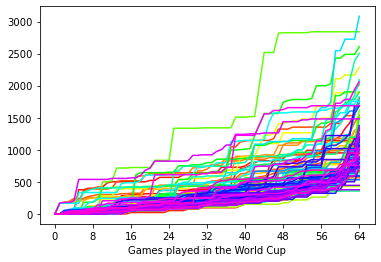

In [99]:
# General

fig = plt.figure()

nColors = len(players)

cm = plt.get_cmap('gist_rainbow')

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/nColors) for i in range(nColors)])

for i in range(nColors):
    if multiply_by_number > 1:
        ax.plot(np.arange(len(players_points[i,:])),(players_points[i,:]*multiply_by_number).astype(int), label = players[i])
    else:
        ax.plot(np.arange(len(players_points[i,:])),players_points[i,:], label = players[i])

#plt.plot(values_team * shares.T, label = teams);
# ax.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left');
# ax.set_xticks(np.arange(len(df_res)+1))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Games played in the World Cup')

In [100]:
# General

for player in players:

    fig = plt.figure()

    for i,p in enumerate(players):
        if multiply_by_number > 1:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(players_points[i,:])),(players_points[i,:]*multiply_by_number).astype(int), color = 'silver')
        else:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(players_points[i,:])),players_points[i,:], color = 'silver')

    idxPlayer = players.index(player)
    if multiply_by_number > 1:
        plt.plot(np.arange(len(players_points[idxPlayer,:])),(players_points[idxPlayer,:]*multiply_by_number).astype(int), color = 'blue', linewidth = 2)
    else:
        plt.plot(np.arange(len(players_points[idxPlayer,:])),players_points[idxPlayer,:], color = 'blue', linewidth = 2)
    
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Games played in the World Cup')
    plt.ylabel('Points')
    plt.savefig(outpath + ''.join(strip_accents(player).lower().split()) + '_general.png', dpi = 400)
    plt.close(fig)

Text(0.5, 0, 'Games played in the World Cup')

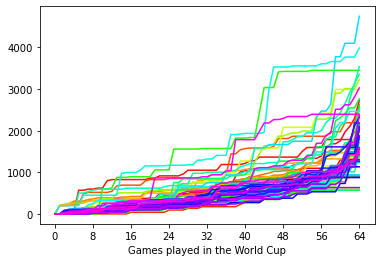

In [101]:
# Betting

fig = plt.figure()

nColors = len(betting_players)

cm = plt.get_cmap('gist_rainbow')

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/nColors) for i in range(nColors)])

for i in range(nColors):
    if multiply_by_number > 1:
        ax.plot(np.arange(len(betting_players_points[i,:])),(betting_players_points[i,:]*multiply_by_number).astype(int), label = betting_players[i])
    else:
        ax.plot(np.arange(len(betting_players_points[i,:])),betting_players_points[i,:], label = betting_players[i])

#plt.plot(values_team * shares.T, label = teams);
# ax.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left');
# ax.set_xticks(np.arange(len(df_res)+1))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Games played in the World Cup')

In [102]:
# Betting

for player in betting_players:

    fig = plt.figure()

    for i,p in enumerate(betting_players):
        if multiply_by_number > 1:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(betting_players_points[i,:])),(betting_players_points[i,:]*multiply_by_number).astype(int), color = 'silver')
        else:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(betting_players_points[i,:])),betting_players_points[i,:], color = 'silver')

    idxPlayer = betting_players.index(player)
    if multiply_by_number > 1:
        plt.plot(np.arange(len(betting_players_points[idxPlayer,:])),(betting_players_points[idxPlayer,:]*multiply_by_number).astype(int), color = 'blue', linewidth = 2)
    else:
        plt.plot(np.arange(len(betting_players_points[idxPlayer,:])),betting_players_points[idxPlayer,:], color = 'blue', linewidth = 2)
    
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Games played in the World Cup')
    plt.ylabel('Points')
    plt.savefig(outpath + ''.join(strip_accents(player).lower().split()) + '_betting.png', dpi = 400)
    plt.close(fig)

### General League vs Betting League

In [103]:
idx_betting = np.argwhere(np.array(money) == 'YES').flatten()
idx_fun = np.argwhere(np.array(money) == 'NO').flatten()
total_everybody_shares = np.sum(shares,axis = 1)
everybody_players_points = players_points[:,1:]

In [104]:
players_points.shape

(109, 65)

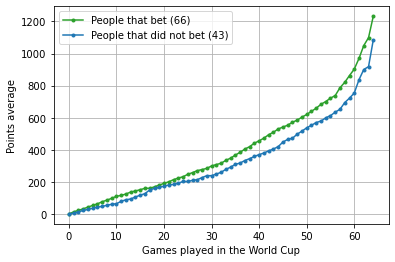

In [105]:
cmap = plt.get_cmap("tab10")

plt.plot(np.arange(len(df_res)+1),np.concatenate(([0],np.mean(everybody_players_points[idx_betting,:]*multiply_by_number,axis = 0))),'.-',label = 'People that bet (' + str(len(idx_betting)) + ')', color = cmap(2))
plt.plot(np.arange(len(df_res)+1),np.concatenate(([0],np.mean(everybody_players_points[idx_fun,:]*multiply_by_number,axis = 0))),'.-',label = 'People that did not bet (' + str(len(idx_fun)) + ')', color = cmap(0))
# plt.xticks(np.arange(1,len(df_res)+1));
plt.xlabel('Games played in the World Cup')
plt.ylabel('Points average')
plt.grid()
plt.legend()
plt.savefig(outdir + 'betting_vs_general.png',bbox_inches='tight', dpi=1000)

In [106]:
everybody_values_team = points / total_everybody_shares
everybody_points = np.nansum(everybody_values_team * shares.T,axis=1).round(decimals=3)
everybody_ranking = dict(zip(players,everybody_points))
everybody_ranking = dict(sorted(everybody_ranking.items(), key=operator.itemgetter(1),reverse=True))

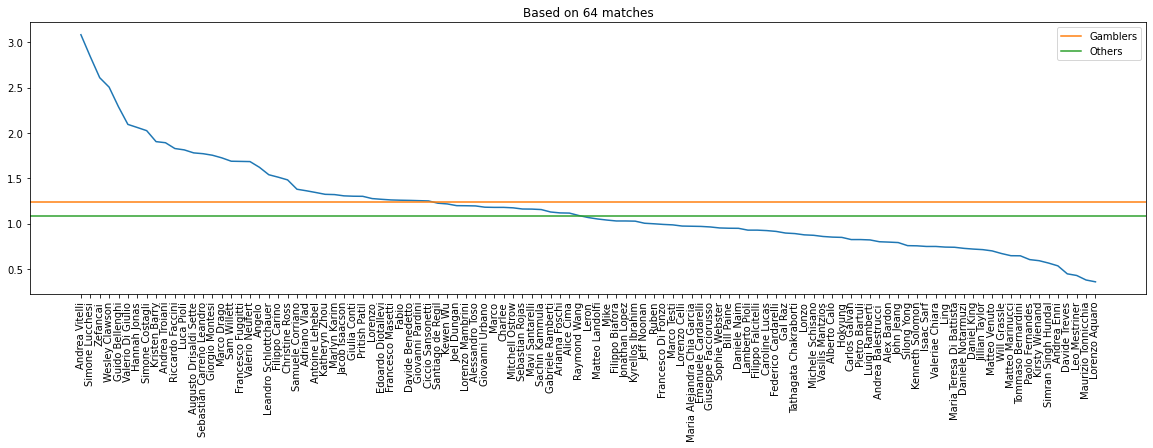

In [107]:
x, y = zip(*everybody_ranking.items()) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize = (20,5))

cmap = plt.get_cmap("tab10")

ax.plot(x, y)
ax.axhline(np.mean(everybody_points[idx_betting]), color = cmap(1), label = 'Gamblers')
ax.axhline(np.mean(everybody_points[idx_fun]), color = cmap(2), label = 'Others')
ax.set_xticklabels(x, rotation=90);
ax.set_title('Based on %s matches' %(len(df_res)))
ax.legend()

### Contribution of each team to the players

In [108]:
team_player = values_team * shares.T
betting_team_player = betting_values_team * betting_shares.T

Text(0.5, 1.0, 'General population')

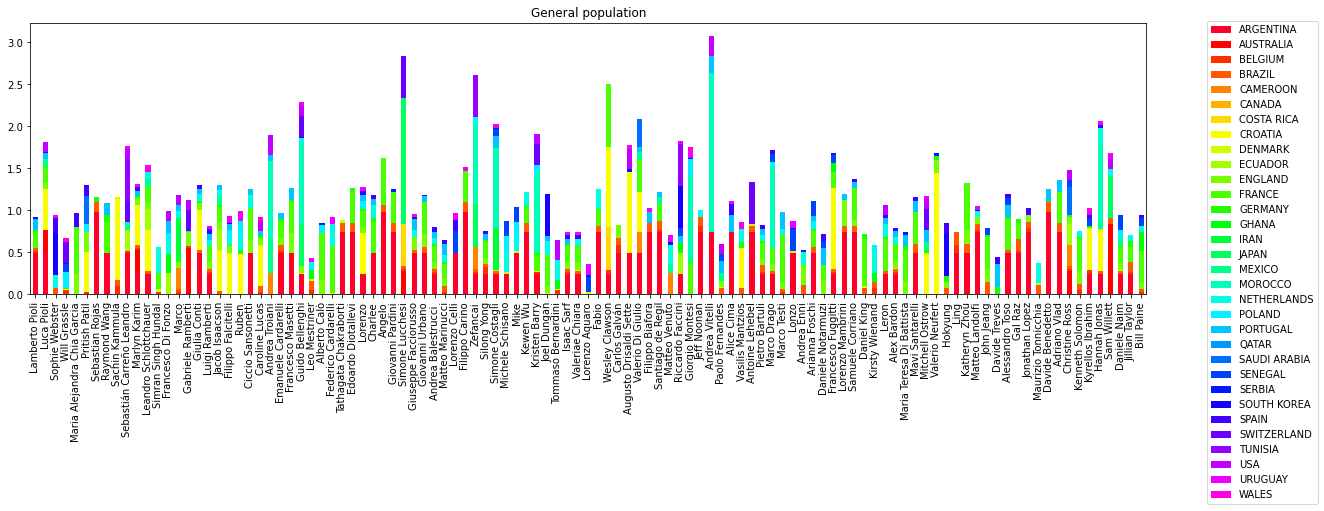

In [109]:
data = {}
df_bar = pd.DataFrame(data, index = players)

for i,x in enumerate(teams):
    df_bar[x] = team_player[:,i]

df_bar = df_bar.fillna(0)

nColors = len(teams)

df_bar.plot.bar(stacked=True, figsize = (20,5), color = [cm(1.*i/nColors) for i in range(nColors)])
plt.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left')
plt.title('General population')

Text(0.5, 1.0, 'Betting population')

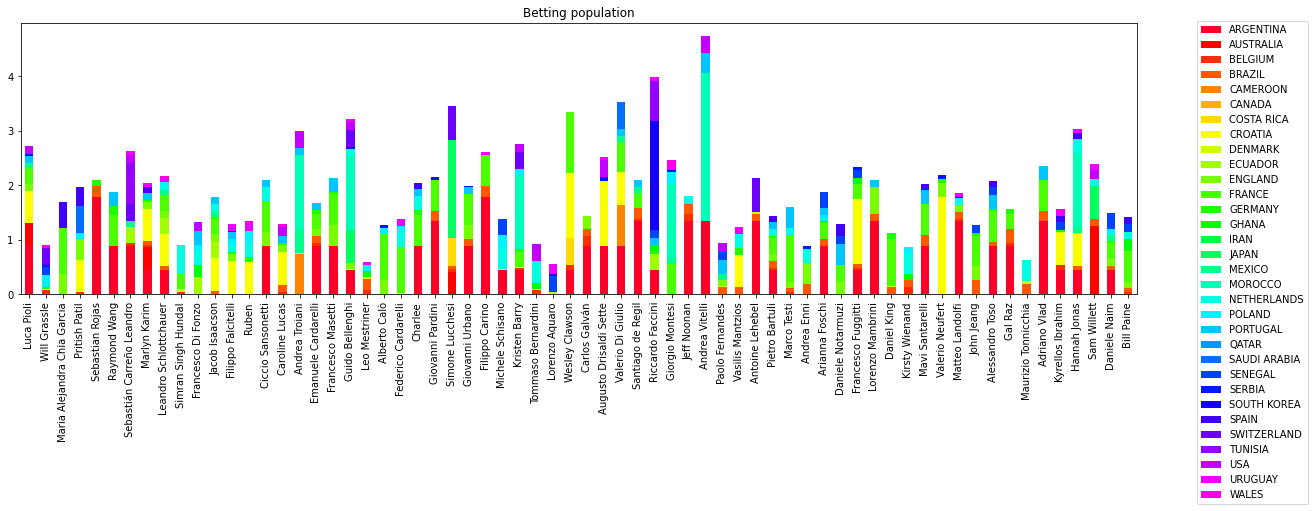

In [110]:
data = {}
df_bar = pd.DataFrame(data, index = betting_players)

for i,x in enumerate(teams):
    df_bar[x] = betting_team_player[:,i]
    
df_bar = df_bar.fillna(0)

nColors = len(teams)

df_bar.plot.bar(stacked=True, figsize = (20,5), color = [cm(1.*i/nColors) for i in range(nColors)])
plt.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left')
plt.title('Betting population')

### Game theory question

Given the results of the game and the World Cup matches, if you could play again, where would you invest your shares knowing that everyone can create again their team?

In [111]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))
teams = np.array(teams)
teams

array(['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
       'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
       'FRANCE', 'GERMANY', 'GHANA', 'IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
       'SENEGAL', 'SERBIA', 'SOUTH KOREA', 'SPAIN', 'SWITZERLAND',
       'TUNISIA', 'USA', 'URUGUAY', 'WALES'], dtype='<U12')

In [112]:
after_users = pd.read_csv('website_users_after.csv')
after_users = after_users.iloc[: , 1:]
after_users.name = after_users.name.str.title()
after_users.loc[after_users['name'] == 'Santiago De Regil', 'name'] = 'Santiago de Regil'
after_players = after_users['name'].tolist()

for index, row in after_users.iterrows():
    if row['name'] in name_to_index:
        row['name'] = name_to_index[row['name']]
    else:
        print(row['name'])

after_users.to_csv('users_after.csv')
after_users.head(5)

,name,share1,share10,share2,share3,share4,share5,share6,share7,share8,share9
0,Player 89,POLAND,ARGENTINA,POLAND,MOROCCO,MOROCCO,MOROCCO,JAPAN,JAPAN,SOUTH KOREA,ARGENTINA
1,Player 86,CROATIA,BRAZIL,JAPAN,JAPAN,MOROCCO,FRANCE,ENGLAND,PORTUGAL,ARGENTINA,ARGENTINA
2,Player 28,IRAN,MOROCCO,POLAND,ARGENTINA,ARGENTINA,ARGENTINA,JAPAN,JAPAN,FRANCE,CROATIA
3,Player 30,ARGENTINA,PORTUGAL,ARGENTINA,ARGENTINA,ARGENTINA,FRANCE,FRANCE,CROATIA,CROATIA,CROATIA
4,Player 76,URUGUAY,ARGENTINA,URUGUAY,TUNISIA,TUNISIA,MEXICO,MEXICO,GERMANY,GERMANY,ARGENTINA


In [113]:
after_shares = []

for index, row in after_users.iterrows():
    shares_player = np.zeros(len(teams))
    for share in range(1,11):
        shares_player[np.argwhere(teams == row['share' + str(share)]).item()] += 1
    after_shares.append(shares_player.tolist())

after_shares = np.array(after_shares).T
after_shares.shape

(32, 49)

In [114]:
for team in teams:

    players_per_team = []

    for player in sorted(after_players):

        idx = after_players.index(player)
        values = after_shares[:,idx]
        choices = []

        for i,x in enumerate(values):
            if x == 0:
                continue
            for j in range(int(x)):
                if team == teams[i]:
                    players_per_team.append('<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(player).lower().split()) + '_general_after.html\">' + player + '</a>')

    res = pd.DataFrame(players_per_team, columns = ['<b>Shareholder</b>'])
    res.index += 1
    res.to_csv(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general_after.csv')

    text = open(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general_after.csv', "r")
    text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
    text = ''.join([i for i in text]).replace('\"\">', '\">')
    text = ''.join([i for i in text]).replace('</a>\"', '</a>')
    x = open(outpath_teams + ''.join(strip_accents(team).lower().split()) + '_general_after.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general_after.csv')

html_dir = './teams_html/'
originalfile = 'teams_template.html'

for team in teams:

    namefile = html_dir + ''.join(strip_accents(team).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(team).lower().split()) + '_general_after')
        text = ''.join([i for i in text]).replace('Template', team)
        x = open(namefile[:-9] + "_general_after.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

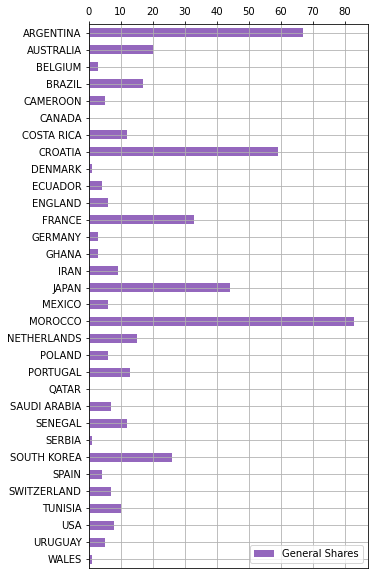

In [115]:
after_total_shares = np.sum(after_shares,axis = 1)

data = {'General Shares': after_total_shares,
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General Shares'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax, color = cmap(4))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
# plt.savefig(outdir + 'after_general_shares.png',bbox_inches='tight', dpi=1000)

In [116]:
points, eliminated_teams, third_place, second_place, first_place, after_players_points = compute_points(df_res,players=after_players,total_shares=after_total_shares,shares=after_shares)

In [117]:
after_values_team = (points / after_total_shares).round(decimals = 3)

after_general_ranking = dict(zip(after_players,np.nansum(after_values_team * after_shares.T,axis=1).round(decimals=3)))
after_general_ranking = dict(sorted(after_general_ranking.items(), key=operator.itemgetter(1),reverse=True)) 

In [118]:
teams_general_after = []

for team in teams:
    teams_general_after.append('<a href=\"https://naiimic.github.io/content/fantasyshares/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_general_after.html\">' + team + '</a>')

general_contribution = list(zip(teams_general, total_shares.astype(int), points, values_team))
res = pd.DataFrame(general_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
res.to_csv(outdir + 'tmp_general_contribution_after.csv',index=False) 

text = open(outdir + "tmp_general_contribution_after.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_contribution_after.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_contribution_after.csv")

In [119]:
'''
    Function to create csv for all the players, showing their squad. A team will be "striked" if is no longer in the tournament
'''

html_dir = './players_html/'
originalfile = 'template_after.html'

for player in after_players:

    idx = after_players.index(player)
    values = after_shares[:,idx]
    choices = []
    
    teams_points_players = []

    for i,x in enumerate(values):
        if x == 0:
            continue
        for j in range(int(x)):
            if teams[i] in eliminated_teams:
                # choices.append('<span style=\"color: red;\">' + teams[i] + '</span>')
                # choices.append('<span><strike>' + teams[i] + '</strike></span>')
                choices.append(teams[i])
            elif teams[i] in third_place:
                choices.append('<span style=\"color: brown;\"><b>' + teams[i] + '</b></span>') # bronze
            elif teams[i] in second_place:
                choices.append('<span style=\"color: silver;\"><b>' + teams[i] + '</b></span>') # silver
            elif teams[i] in first_place:
                choices.append('<span style=\"color: gold;\"><b>' + teams[i] + '</b></span>') # gold
            else:
                choices.append(teams[i])
            teams_points_players.append(int(general_contribution[i][3] * multiply_by_number))

    res = pd.DataFrame(list(zip(choices, teams_points_players)), columns = ['<b>Team</b>', '<b>Points</b>'])
    res.index += 1

    res.to_csv(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general_after.csv') 
    text = open(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general_after.csv', "r")
    text = ''.join([i for i in text]).replace('\"<span', '<span')
    text = ''.join([i for i in text]).replace('\"\"', '\"')
    text = ''.join([i for i in text]).replace('</span>\"', '</span>')

    x = open(outpath + ''.join(strip_accents(player).lower().split()) + '_general_after.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general_after.csv')

    namefile = html_dir + ''.join(strip_accents(player).lower().split()) + '_tmp_after.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(player).lower().split()) + '_general_after')
        text = ''.join([i for i in text]).replace('Template', player)
        x = open(namefile[:-9] + "_general_after.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

In [120]:
html_ranking = {}

for ik,key in enumerate(after_general_ranking):
    if after_general_ranking[key] > 0 and multiply_by_number == 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = '{0:.3f}'.format(general_ranking[key])
    elif after_general_ranking[key] > 0 and multiply_by_number > 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = int(after_general_ranking[key]*multiply_by_number)
    else:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = int(after_general_ranking[key])

htmlrankingMatrix = np.zeros((len(after_players),2),dtype=object)
htmlrankingMatrix[:,0] = list(html_ranking.keys())
htmlrankingMatrix[:,1] = list(html_ranking.values())

res = pd.DataFrame(htmlrankingMatrix, columns = ['<b>Name</b>', '<b>Points</b>'])
res.index += 1 
res = res.rename(index={1:'&#129351'})
res.to_csv(outdir + 'tmp_general_ranking_after.csv') 

text = open(outdir + "tmp_general_ranking_after.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_ranking_after.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_ranking_after.csv")